# 5.1

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('prostate.csv')

#a

In [ ]:
#liczba obserwacji i cech:
df1.shape
#odp mamy 102 cechy i 6034 obserwacje

(102, 6034)

In [ ]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,6025,6026,6027,6028,6029,6030,6031,6032,6033,y
0,-0.930895,-0.839996,0.062508,-0.361594,-1.124427,-1.180492,-1.092276,-1.149624,-1.157503,0.219849,...,0.492456,-0.753197,0.377710,-0.845797,0.686091,-1.091779,0.347228,-0.901310,-0.252259,0
1,-0.751885,-0.848271,0.102895,2.421034,0.182211,0.639267,-0.224728,0.119039,1.694874,-0.074817,...,-0.959873,1.374652,-0.903991,1.332845,-0.574808,2.143548,0.101821,1.326812,-0.091503,0
2,-0.545781,-0.851687,-0.003043,-0.122089,0.837907,-1.195882,-0.931749,-1.164679,-0.549045,3.828663,...,-0.869585,-0.362556,-0.907472,-0.341481,-0.577905,-0.006464,-0.920312,-0.085084,-0.704808,0
3,-1.078519,-0.159610,0.215347,-0.096277,1.050548,0.654914,1.086128,-1.127224,0.603476,-0.532284,...,-0.928211,-0.909437,-0.872889,-0.823525,-1.055268,-1.069403,-0.792237,-0.879015,-0.672488,0
4,-0.994677,-0.751905,-1.163109,-1.130144,1.695673,0.878677,-1.097698,1.490272,1.314783,-1.112842,...,0.407184,-0.935771,-0.898889,-0.849075,-1.082933,-1.097196,-0.911702,-0.905071,-0.696659,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#dziele model:
x, y = df1.values[:,:-1], df1.values[:,-1]
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(penalty ='none', max_iter=1000).fit(x_tr, y_tr)

##b

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
model1_2 = LogisticRegressionCV(penalty = 'l2', Cs = [0.001, 0.01,0.1, 1, 10, 100, 1000], max_iter=1000).fit(x_tr,y_tr)

In [ ]:
#model z optymalnym par C
model1_2.C_

array([0.001])

##c

In [ ]:
model1_3 = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', Cs = [0.001, 0.01,0.1, 1, 10, 100, 1000]).fit(x_tr,y_tr)

In [ ]:
model1_3.C_

array([100.])

## d

In [ ]:
model_l1 = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', Cs = [100]).fit(x_tr,y_tr)
model_l2 = LogisticRegressionCV(penalty = 'l2', Cs = [0.001]).fit(x_tr,y_tr)

##e

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
fpr_l, trp_l, _ = roc_curve(y_te, model1.predict_proba(x_te)[:,1])
fpr_l1, trp_l1, _ = roc_curve(y_te, model_l1.predict_proba(x_te)[:,1])
fpr_l2, trp_l2, _ = roc_curve(y_te, model_l2.predict_proba(x_te)[:,1])

In [ ]:
# obliczenie auc
a1 = roc_auc_score(y_te, model1.predict_proba(x_te)[:,1])
a2 = roc_auc_score(y_te, model_l1.predict_proba(x_te)[:,1])
a3 = roc_auc_score(y_te, model_l2.predict_proba(x_te)[:,1])

In [ ]:
print(a1, a2, a3)

0.7797619047619048 0.9166666666666667 0.7619047619047619


In [ ]:
import matplotlib.pyplot as plt

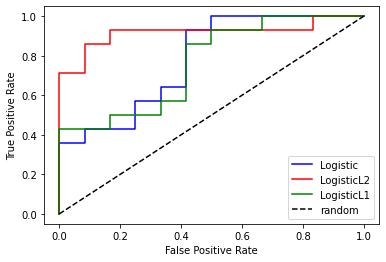

In [ ]:
plt.plot(fpr_l, trp_l, c = 'blue', label='Logistic')
plt.plot(fpr_l1, trp_l1, c= 'red', label='LogisticL2')
plt.plot(fpr_l2, trp_l2, c= 'green', label='LogisticL1')
plt.plot([0, 1], [0, 1], color='black', linestyle='--',label = 'random')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#5.2

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving earthquake.csv to earthquake (2).csv


{'earthquake.csv': b'"popn","body","surface"\r\n"equake",5.6,4.25\r\n"equake",5.18,3.93\r\n"equake",6.31,6.3\r\n"equake",5.36,4.49\r\n"equake",5.96,6.39\r\n"equake",5.26,4.42\r\n"equake",5.17,5.1\r\n"equake",4.75,4.4\r\n"equake",5.35,5.49\r\n"equake",5.01,4.48\r\n"equake",5.27,4.41\r\n"equake",5.27,4.69\r\n"equake",4.98,3.66\r\n"equake",5.22,3.99\r\n"equake",5.06,4.58\r\n"equake",5.09,4.9\r\n"equake",5.15,4.82\r\n"equake",4.56,4.08\r\n"equake",5,4.94\r\n"equake",5.43,5.48\r\n"explosn",6.04,4.33\r\n"explosn",5.97,4.39\r\n"explosn",5.84,4.35\r\n"explosn",5.79,4.14\r\n"explosn",5.87,3.9\r\n"explosn",6.51,4.49\r\n"explosn",5.74,4.22\r\n"explosn",5.98,4.08\r\n"explosn",6.07,4.3\r\n'}

In [ ]:
df2 = pd.read_csv('earthquake.csv')

In [ ]:
df2.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


##a

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2.iloc[:,0]

0      equake
1      equake
2      equake
3      equake
4      equake
5      equake
6      equake
7      equake
8      equake
9      equake
10     equake
11     equake
12     equake
13     equake
14     equake
15     equake
16     equake
17     equake
18     equake
19     equake
20    explosn
21    explosn
22    explosn
23    explosn
24    explosn
25    explosn
26    explosn
27    explosn
28    explosn
Name: popn, dtype: object

In [ ]:
df2.iloc[:,0] = LabelEncoder().fit_transform(df2.iloc[:,0])

In [ ]:
df2.head()

,popn,body,surface
0,0,5.60,4.25
1,0,5.18,3.93
2,0,6.31,6.30
3,0,5.36,4.49
4,0,5.96,6.39


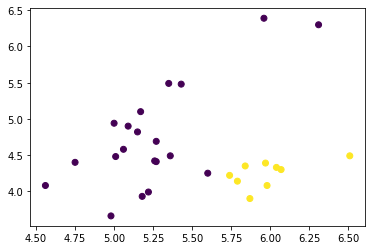

In [ ]:
plt.scatter(df2.values[:,1], df2.values[:,2], c = df2.values[:,0])


## b

### macierz kowariancji

In [ ]:
X, y = df2.values[:, 1:], df2.values[:, 0]

In [ ]:
x0 = X[y==0,:]
x1 = X[y==1,:]

do wyza=naczania macierzy kowariancji mamy funkcje numpy'owa np.cov

In [ ]:
# macierz kowariancji dla klasy zerowej
np.cov(x0.T,ddof = 1)

array([[0.14782   , 0.20000526],
       [0.20000526, 0.52703158]])

In [ ]:
# macierz kowariancji dla klasy pierwszej
np.cov(x1.T, ddof= 1)

array([[0.05226111, 0.02345556],
       [0.02345556, 0.03252778]])

### macierz kowariancji wewnatrzgrupowej

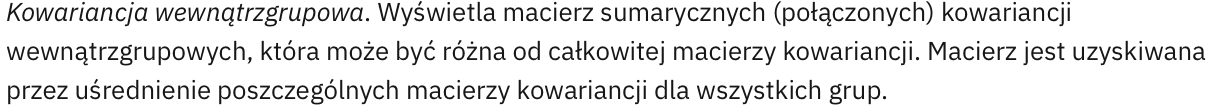

In [ ]:
cov_w = (np.cov(x0.T,ddof=1)*(x0.shape[0]-1)+np.cov(x1.T,ddof=1)*(x1.shape[0]-1))/(X.shape[0]-2)

In [ ]:
cov_w

array([[0.11950626, 0.14769424],
       [0.14769424, 0.38051193]])

### równanie prostej dzielącej

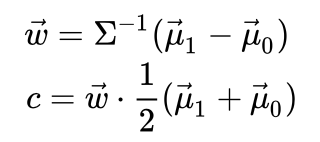

In [ ]:
#współczynnik kierunkowy prostej:
a = np.linalg.inv(cov_w)@(np.mean(x1, axis = 0)- np.mean(x0, axis = 0))
a

array([14.83189373, -7.05928137])

In [ ]:
#wyraz wolny proste:
b = (np.mean(x1, axis = 0)- np.mean(x0, axis = 0))@np.linalg.inv(cov_w)@(np.mean(x1, axis = 0)+np.mean(x0, axis = 0))/2-np.log(x1.shape[0]/x0.shape[0])

In [ ]:
b

52.35207447097909

##c

** Teraz zajmujemy się LDA  - LinearDiscirminantAnalysis **

---
LDA instead makes the additional simplifying homoscedasticity assumption (i.e. that the class covariances are identical

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf = LinearDiscriminantAnalysis(store_covariance = True)
clf.fit(X,y)

LinearDiscriminantAnalysis(store_covariance=True)

In [ ]:
#wspólczynniki kierunkowe prostej:
print(clf.coef_)

[[14.83189373 -7.05928137]]


In [ ]:
#tej kowariamcji używamy do wzynaczenia współczynników prostej dzielącej klasy
clf.covariance_

array([[0.11126444, 0.13750843],
       [0.13750843, 0.35426973]])

##d

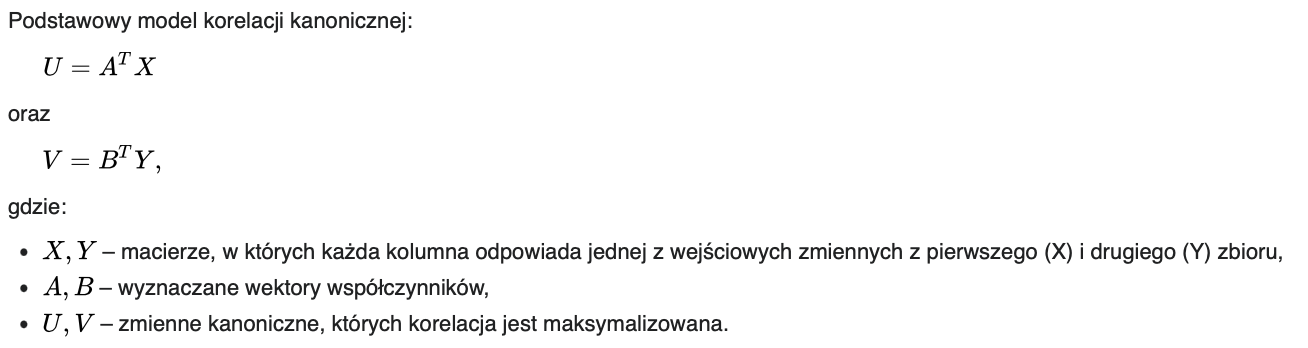

In [ ]:
U = x0@clf.coef_[0]
V = x1@clf.coef_[0]

In [ ]:
U

array([53.05665908, 49.08623375, 49.11577682, 47.80277705, 43.28927868,
       46.81373737, 40.67855561, 39.3906572 , 40.59517674, 42.68220706,
       47.03264913, 45.05605034, 48.02586097, 49.25595262, 42.71787361,
       40.90386038, 42.35851652, 38.83156743, 39.28661869, 41.85232105])

In [ ]:
V

array([59.01794981, 57.55616037, 55.91038544, 56.65123984, 59.53201887,
       64.85945485, 55.34490264, 59.89285653, 59.67468506])

In [ ]:
# wyznaczenie progu oddzielającego klasy:
- clf.intercept_ # wyraz wolny

array([52.35207447])

In [ ]:
#na podstawie powyższych danych widzimy, że zerowa obserwacja z klasy 0 zostałą źle zaklasyfikowana

## d

In [ ]:
body = 6
surface = 4

In [ ]:
#dokonanie predykcji za pomocą wbudowanej funkcji LDA:
print('predict:',clf.predict([[body, surface]]))
# bardziej ręcznie:
print('recznie:',np.array([6,4])@clf.coef_[0] )

predict: [1.]
recznie: 60.75423691481414


In [ ]:
[6,4]@cl

(1, 2)

##e

In [ ]:
print(clf.predict_proba(np.array([[6,4]]))[0][1])

0.9997756687492025


# 5.3

In [ ]:
df3 = pd.read_csv('prostate.csv')

##a

In [ ]:
x, y = df3.values[:,0:100], df3.values[:,-1]
#dzieki temu, że do train_test_split wkładamy jednoczesnie x i y dane sie mieszają jednocześnie
xrest, xte, yrest, yte = train_test_split(x, y, test_size = 0.4)

In [ ]:
xtr, xval, ytr, yval = train_test_split(xte, yte, test_size = 0.25)

## b

In [ ]:
alphas = [0, 0.2, 0.5, 0.7, 1]

In [ ]:
for i in alphas:
  modelLDA  = LinearDiscriminantAnalysis(solver = 'lsqr',shrinkage = i).fit(xtr, ytr) # shrinkage <- im większy tym bardziej regularyzujemy
  pred = modelLDA.predict_proba(xval)
  prediction_of_1_class = pred[:,1]
  auc  = roc_auc_score(yval, prediction_of_1_class)  #wybieramy parametr gdzie AUC było największe na zb. walidacyjnym 
  print(i, auc)

0 0.5416666666666666
0.2 0.75
0.5 0.75
0.7 0.75
1 0.75


## c

In [ ]:
# wg powyższych obliczen optymalne alfa to: 0.7
modelLDAopt = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 0.7).fit(xrest, yrest)

In [ ]:
#wspolczynnik AUC
czy1 = modelLDAopt.predict_proba(xte)[:,1]
auc_opt = roc_auc_score(yte, czy1)
auc_opt
fpr, tpr, _ = roc_curve(yte, czy1)

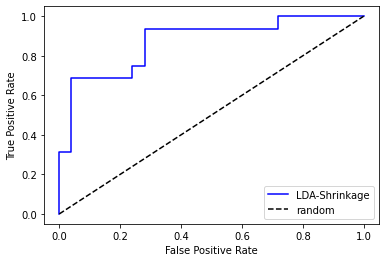

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, c = 'blue', label='LDA-Shrinkage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--',label = 'random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()